<h1> <center><u> Adversarial Attacks on Images</u> </center></h1>
<h3 align = 'center'> Vinutha Shivakumar</h3>

In [1]:
import tensorflow as tf
import random
# libraries for data manipulation
import numpy as np
import pandas as pd	

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# MNIST is an inbuilt dataset on tensorflow
mnist = tf.keras.datasets.mnist

# split the data into test and train sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# check the size of the datsets
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
# We have 60000 datapoints in train dataset and 10000 datapoints in test dataset
# each denoting pixel information of a 28 * 28 image of a handwritten number

# Normalizing the data by divinding it with 255
# The reason is because the pixel values of the image can vary between 0-255
x_train, x_test = x_train / 255.0, x_test / 255.0

<h3> EDA on MNIST Data <h3>

In [4]:
# combine the x , y train and test arrays into pandas dataframe for EDA purpose

# unwrapping the dataset such that each row contains the pixel information of 
# each image and storing in the dataframe

# using the reshape function to convert a 3d array to 2d
# The number of rows remain same , the 28 * 28 matrix containing pixel info is
# unwrapped into a single row
mnist_train = pd.DataFrame(x_train.reshape(x_train.shape[0], 
                                           x_train.shape[1] * x_train.shape[2]))

# repeat the same for test data
mnist_test = pd.DataFrame(x_test.reshape(x_test.shape[0], 
                                           x_test.shape[1] * x_test.shape[2]))

# Create column names for dataframe to make it more readable
colnames = ['Pixel'+str(i) for i in range(1,785)]

mnist_train.columns = colnames
mnist_test.columns = colnames

# concatenate the labels into the test and train dataframe
mnist_train['label'] = y_train
mnist_test['label'] = y_test


mnist_train.head()

,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,Pixel10,...,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,Pixel784,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [5]:
mnist_test.head()

,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,Pixel10,...,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,Pixel784,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [6]:
# check if there is any NaN or missing datapoints
mnist_train.isnull().values.sum()

0

[Text(0.5, 1.0, 'Label distribution in Training Data')]

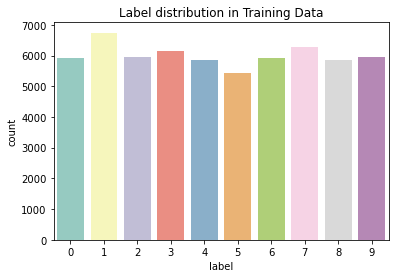

In [7]:
# check label distribution in test and train datasets
sns.countplot(x="label", data=mnist_train, palette="Set3").set(
    title="Label distribution in Training Data")

[Text(0.5, 1.0, 'Label distribution in Test Data')]

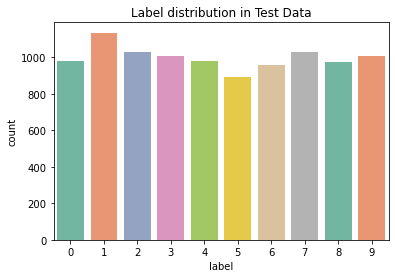

In [8]:
sns.countplot(x="label", data=mnist_test, palette="Set2").set(
    title="Label distribution in Test Data")

There is no imbalance in the dataset wrt the distribution of different classes.

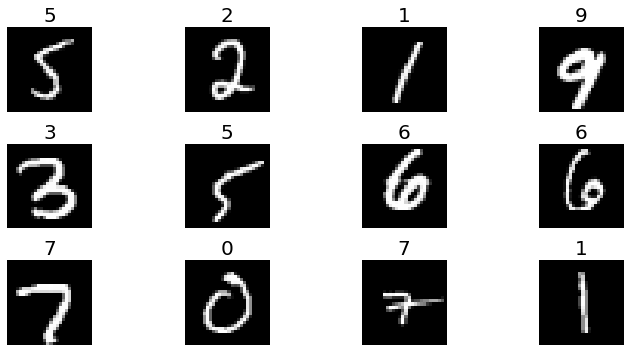

In [9]:
# visualise some of the images from train dataset
# display 4 images per row
fig, axes = plt.subplots(3,4, figsize=(10,5))
# set a tight layout for better spacing between plots
fig.tight_layout()
axes = axes.flatten()
# generate 12 random row numbers to select from mnist_train dataframe
idx = np.random.randint(0,mnist_train.shape[0],size=12)
for i in range(12):
    # get the row data
    pixel_data = mnist_train.iloc[idx[i]]
    # use imshow to build the image using pixel info
    # reshape is necessary because imshow expects a 2d array structure as input
    axes[i].imshow(np.array(pixel_data[:784]).reshape(28,28), cmap='gray')
    axes[i].axis('off') 
    # add the label of the image as title
    axes[i].set_title(str(int(pixel_data[-1])), color= 'black', fontsize=20)
    

<h3> Models <h/3>
    <h4> XGBOOST </h4>

In [10]:
import xgboost as xb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# splitting the training data into train and validate datasets
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train, 
                                                  test_size=0.1)

# All the numpy array structures need to be transformed to DMatrix structure
# which is optimized specifically for XGBoost models
# reshaping the x_train, x_val and x_test to a 2d matrix
xgb_train_matrix = xb.DMatrix(x_train.reshape(x_train.shape[0], 
                                    x_train.shape[1] * x_train.shape[2]), 
                              label=y_train)

xgb_val_matrix = xb.DMatrix(x_val.reshape(x_val.shape[0], 
                                    x_val.shape[1] * x_val.shape[2]), 
                              label=y_val)

xgb_test_matrix = xb.DMatrix(x_test.reshape(x_test.shape[0], 
                                    x_test.shape[1] * x_test.shape[2]), 
                              label=y_test)

# set the hyperparameters for the model
params = {
    'max_depth': 10,                # the maximum depth of each tree
    'eta': 0.7,                     # the training step for each iteration
    'objective': 'multi:softmax',   # multiclass classification using the softmax objective
    'num_class': 10,                # labels range from 0-9 hence the num_classes is 10
    'eval_metric': ['merror' ,      # evaluation metric as mean squared error
                    'mlogloss']     # and log loss
}  

results = {}
xgb_model = xb.train(params, xgb_train_matrix, evals=[(xgb_train_matrix, 'train'),
                                                      (xgb_val_matrix, 'val')],
                     num_boost_round=10,
                     evals_result = results,
                     verbose_eval=True)

y_pred = xgb_model.predict(xgb_test_matrix)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	train-merror:0.05944	train-mlogloss:0.43247	val-merror:0.10200	val-mlogloss:0.54001
[1]	train-merror:0.02420	train-mlogloss:0.23599	val-merror:0.07550	val-mlogloss:0.37882
[2]	train-merror:0.01380	train-mlogloss:0.13852	val-merror:0.06533	val-mlogloss:0.28916
[3]	train-merror:0.00737	train-mlogloss:0.08181	val-merror:0.06117	val-mlogloss:0.23489
[4]	train-merror:0.00385	train-mlogloss:0.05077	val-merror:0.05267	val-mlogloss:0.20119
[5]	train-merror:0.00178	train-mlogloss:0.03236	val-merror:0.05017	val-mlogloss:0.17606
[6]	train-merror:0.00072	train-mlogloss:0.02134	val-merror:0.04567	val-mlogloss:0.16204
[7]	train-merror:0.00037	train-mlogloss:0.01478	val-merror:0.04300	val-mlogloss:0.15153
[8]	train-merror:0.00015	train-mlogloss:0.01076	val-merror:0.04233	val-mlogloss:0.14337
[9]	train-merror:0.00006	train-mlogloss:0.00810	val-merror:0.04117	val-mlogloss:0.13702
Accuracy: 96.15%


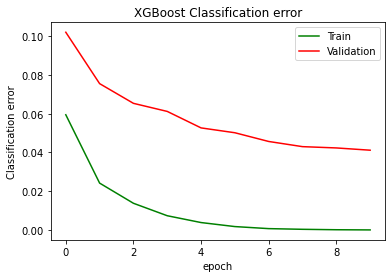

In [11]:
epochs = range(len(results['train']['merror']))
plt.plot(epochs,results['train']['merror'], color='green', label='Train' )
plt.plot(epochs,results['val']['merror'], color='red', label='Validation' )
plt.title('XGBoost Classification error')
plt.xlabel('epoch')
plt.ylabel('Classification error')
plt.legend()
plt.show()

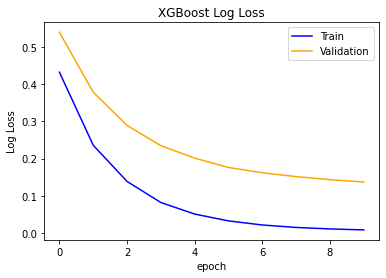

In [12]:
plt.plot(epochs,results['train']['mlogloss'], color='blue', label='Train' )
plt.plot(epochs,results['val']['mlogloss'], color='orange', label='Validation' )
plt.title('XGBoost Log Loss')
plt.xlabel('epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

<h4> CNN </h4>

In [13]:
from keras.utils.np_utils import to_categorical  # convert to one-hot-encoding
from keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization, LeakyReLU, Reshape, Conv2DTranspose
from keras import optimizers
from keras import models

In [14]:
# add a channel dimension to the images
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
x_val= np.expand_dims(x_val, axis=-1)

# one hot encoding all the labels
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_val = to_categorical(y_val,10)

cnn_model = models.Sequential()

cnn_model.add(Conv2D(filters=20, kernel_size=(5, 5), 
                   activation='relu', padding="same", 
                   input_shape=(28,28,1)))
cnn_model.add(BatchNormalization(axis=-1))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters=20, kernel_size=(4, 4), 
                   activation='relu', padding="same"))
cnn_model.add(BatchNormalization(axis=-1))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters=20, kernel_size=(4, 4), 
                   activation='relu', padding="same"))
cnn_model.add(BatchNormalization(axis=-1))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(200, activation='relu'))

cnn_model.add(Dense(10, activation='softmax'))

cnn_model_opt = optimizers.Adam(decay=1e-4)

print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        520       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 20)       80        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 28, 28, 20)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 20)        6420      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 20)       80        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 20)        0

In [15]:
cnn_model.compile(optimizer = cnn_model_opt , loss = "categorical_crossentropy", 
                  metrics=["accuracy"]) 

cnn_model_fit = cnn_model.fit(x_train, 
                        y_train,
                        validation_data = (x_val, y_val),
                        batch_size=128,
                        epochs=10)

cnn_test_accuracy = cnn_model.evaluate(x_test, y_test)
print("Accuracy on test data is : ", cnn_test_accuracy[1] * 100)

Epoch 1/10
422/422 [==============================] - 163s 383ms/step - loss: 0.1659 - accuracy: 0.9543 - val_loss: 1.4114 - val_accuracy: 0.6437
Epoch 2/10
422/422 [==============================] - 164s 389ms/step - loss: 0.0535 - accuracy: 0.9835 - val_loss: 0.0606 - val_accuracy: 0.9818
Epoch 3/10
422/422 [==============================] - 167s 397ms/step - loss: 0.0352 - accuracy: 0.9894 - val_loss: 0.0532 - val_accuracy: 0.9857
Epoch 4/10
422/422 [==============================] - 173s 410ms/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0609 - val_accuracy: 0.9870
Epoch 5/10
422/422 [==============================] - 175s 414ms/step - loss: 0.0194 - accuracy: 0.9939 - val_loss: 0.0595 - val_accuracy: 0.9878
Epoch 6/10
422/422 [==============================] - 162s 384ms/step - loss: 0.0214 - accuracy: 0.9934 - val_loss: 0.0629 - val_accuracy: 0.9873
Epoch 7/10
422/422 [==============================] - 161s 381ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.0603 -

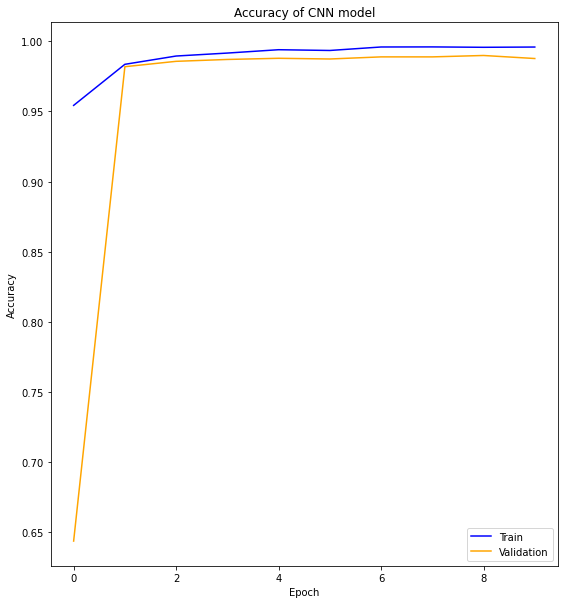

In [16]:
plt.figure(figsize=(20,10))
# plot the accuracy for the train and validation datset
plt.subplot(1,2,1)
plt.plot(cnn_model_fit.history['accuracy'], color='blue', 
         label="Training accuracy")
plt.plot(cnn_model_fit.history['val_accuracy'], color='orange', 
         label="Validation accuracy")
plt.title("Accuracy of CNN model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="lower right")

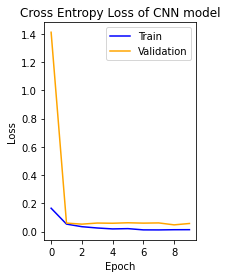

In [17]:
# plot the loss of train and validation dataset
plt.subplot(1,2,2)
plt.plot(cnn_model_fit.history['loss'], color='blue', 
         label="Training loss")
plt.plot(cnn_model_fit.history['val_loss'], color='orange', 
         label="Validation loss")
plt.title("Cross Entropy Loss of CNN model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="upper right")

In [18]:
# visualising examples that are misclassified
y_test_pred = cnn_model.predict(x_test)
errors = np.absolute(y_test_pred - y_test)
errors = [np.round(np.sum(each)) for each in errors]

# check the unique error values generated
set(errors)

313/313 [==============================] - 7s 21ms/step


{0.0, 1.0, 2.0}

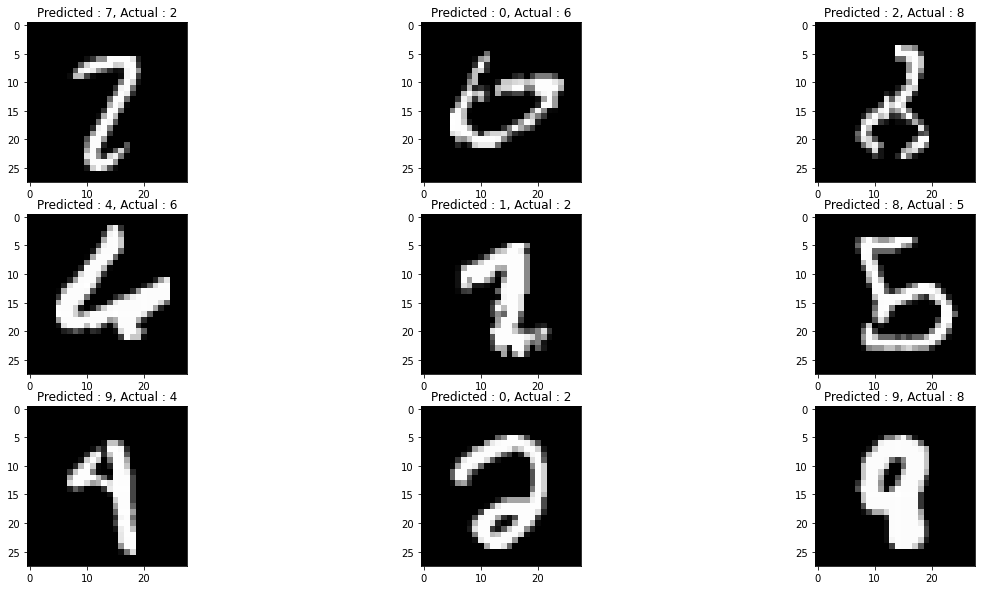

In [19]:
# since 2 is the max error difference i will fetch these indices
# and check if the index with maxvalue match in our prediction and test label
# fetching the max value because of one hot encoding
error_index = [i for i, x in enumerate(errors) if (x==2.0 and 
                                                       (np.argmax(y_test_pred[i])
                                                        !=
                                                        np.argmax(y_test[i])))]

# plot the images
plt.figure(figsize=(20,10))
for i,index in enumerate(error_index[:9]):
    plt.subplot(3,3,i+1)
    plt.title("Predicted : {}, Actual : {}".format(np.argmax(y_test_pred[index]),
                                                   np.argmax(y_test[index])))
    plt.imshow(np.reshape(x_test[index],(28,28)), cmap="gray")

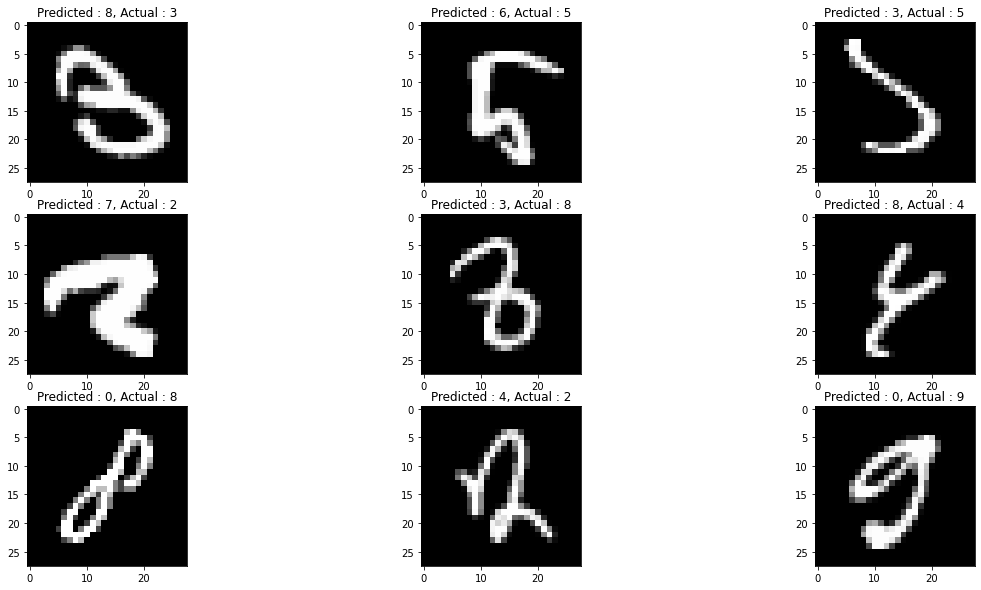

In [20]:
# repeating the same steps as above where error difference is 1.0
error_index = [i for i, x in enumerate(errors) if (x==1.0 and 
                                                       (np.argmax(y_test_pred[i])
                                                        !=
                                                        np.argmax(y_test[i])))]

# plot the images
plt.figure(figsize=(20,10))
for i,index in enumerate(error_index[:9]):
    plt.subplot(3,3,i+1)
    plt.title("Predicted : {}, Actual : {}".format(np.argmax(y_test_pred[index]),
                                                   np.argmax(y_test[index])))
    plt.imshow(np.reshape(x_test[index],(28,28)), cmap="gray")

<h3> Adversarial Attacks </h3>
<p> You can rerun the cells implementing the attacks multiple times to see how often they fool the network. All three attacks do not have an 100% accuracy in fooling the CNN. </p>
<h4> FGSM </h4>

1/1 [==============================] - 0s 54ms/step


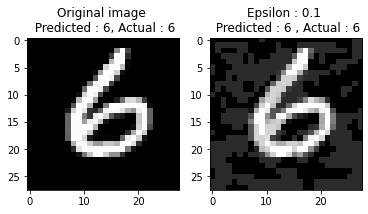

1/1 [==============================] - 0s 46ms/step


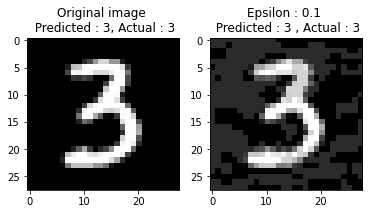

1/1 [==============================] - 0s 62ms/step


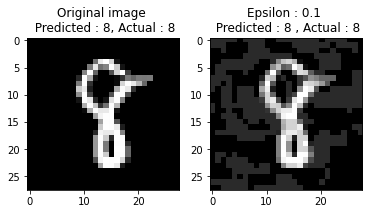

1/1 [==============================] - 0s 28ms/step


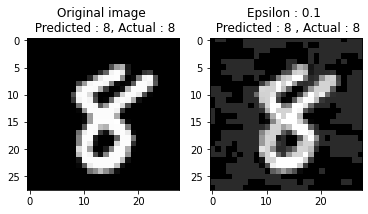

1/1 [==============================] - 0s 69ms/step


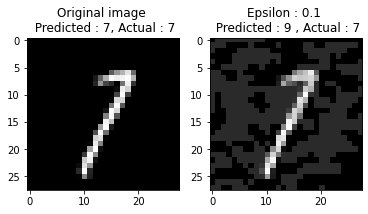

In [21]:
# fetching all the test cases which have been predicted correctly by the model
# I will be creating adversarial examples on these image data to show how
# different types of attack confuse the neural network and misclassify the image
index_correctly_classified = [
    i for i, x in enumerate(errors)
    if (x == 0.0 and (np.argmax(y_test_pred[i]) == np.argmax(y_test[i])))
]

x_test_correctly_classified = x_test[index_correctly_classified]
y_test_correctly_classified = y_test[index_correctly_classified]

loss_object = tf.keras.losses.CategoricalCrossentropy()


def FGSM(model, image, label, eps):
    # cast the image to float object
    image = tf.cast(image, tf.float32)
    # as tensorflow to start recording gradients of image
    with tf.GradientTape() as tape:
        tape.watch(image)
        # use model predictions to obtain loss
        pred = model(image)
        loss = loss_object(label, pred)
# calculate gradients of loss wrt the original image
    gradient = tape.gradient(loss, image)
    # get the sign of gradients which will be a vector of -1,1 or 0
    signed_grad = tf.sign(gradient)
    # update the original image with the signed gradients
    # using a small epsilon will ensure that the changes to image
    # arent visible to human eye
    adversary = (image + (signed_grad * eps)).numpy()
    return adversary


# randomly select 5 images and run fgsm attacks on them
for i in random.sample(range(0, x_test_correctly_classified.shape[0]), 5):
    image = x_test_correctly_classified[i].reshape(1, 28, 28, 1)
    label = y_test_correctly_classified[i].reshape(1, 10)
    perturbed_image = FGSM(cnn_model, image, label, eps=0.1)
    predicted_label = np.argmax(cnn_model.predict(perturbed_image))
    actual_label = np.argmax(label)
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.title("Original image \n Predicted : {}, Actual : {}".format(
        np.argmax(label), actual_label))
    plt.imshow(np.reshape(x_test_correctly_classified[i], (28, 28)),
               cmap="gray")
    plt.subplot(1, 2, 2)
    plt.imshow(perturbed_image[0] * 0.5 + 0.5, cmap="gray")
    plt.title("Epsilon : 0.1 \n Predicted : {} , Actual : {}".format(
        predicted_label, actual_label))
    plt.show()

In [22]:
# test on xgboost for the last adversary created in the above loop

xgb_pred = xgb_model.predict(xb.DMatrix(perturbed_image.reshape(1,28*28)))
print("Actual label : {} , Predicted by XGboost : {}".format(actual_label,xgb_pred[0]))

Actual label : 7 , Predicted by XGboost : 8.0


<h4> Deepfool Attack </h4>

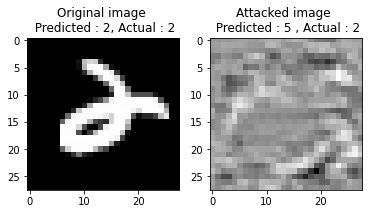

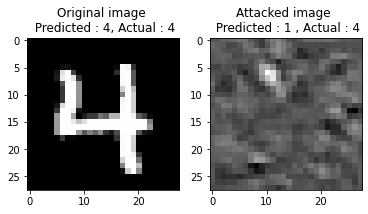

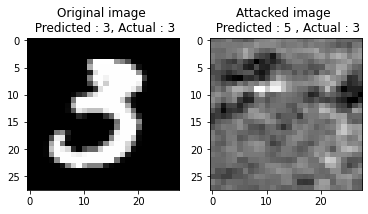

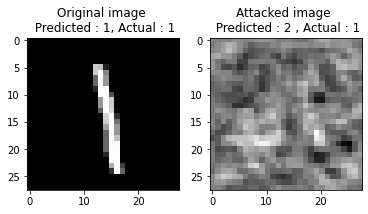

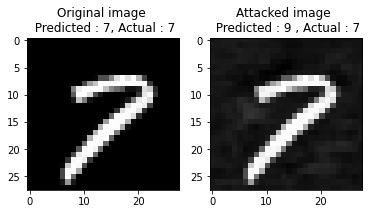

In [23]:
def DeepFool(image, model):
    # cast image to float
    image = tf.cast(image , tf.float32)
    adversary= image
    x = tf.Variable(adversary)
    fs = model(x)
    # the model gives probabilities associated with each label
    # we sort them in descending order and store the indexes
    # this is useful for projecting the image onto the hyperplane of the 
    # next closest label prediction to check if it confuses the model
    label_list = np.argsort(fs)[0][::-1]
    actual_label = label_list[0]
    
    # set the initial gradient change to 0 
    w = np.zeros(np.shape(image))
    # perturbation to image is also set to 0
    r_tot = np.zeros(np.shape(image))

    iteration = 0
    
    # the initial label will be the same as actual label
    k_i = actual_label
    
    # keep looping until there is a change in label prediction upto 50 iterations
    while (k_i == actual_label and iteration < 50):
        # initial perturbation is set to infinity as we want to find
        # the minimum perturbartion to image to misclassify
        pert = np.inf
        # start recording gradient of image
        with tf.GradientTape() as tape:
            tape.watch(x)
            fs = model(x)
            # the loss here taken as the logits probability of the actual label
            loss = fs[0, label_list[0]]
        # get the gradient of loss wrt image
        grad_orig = tape.gradient(loss, x)
        
        # start checking which projection gives least perturbation
        for k in range(1, 10):
            with tf.GradientTape() as tape:
                tape.watch(x)
                fs = model(x)
                # get the logit prob wrt the label we are iteration over
                loss = fs[0, label_list[k]]
            # get gradient of loss wrt image over the new label
            cur_grad = tape.gradient(loss, x)
            
            # check if there is any difference in gradients
            w_k = cur_grad - grad_orig
            
            # change in logits probability
            f_k = (fs[0, label_list[k]] - fs[0, label_list[0]]).numpy()
            
            try:
                # np.linalg.norm without any arguments defaults to 2-norm
                pert_k = abs(f_k) / np.linalg.norm(tf.reshape(w_k, [-1]))
            except ZeroDivisionError:
                # if there is near 0 change in gradient move on to next label
                # to avoid division by zero error
                break
            
            # update to lowest perturbation and gradient
            if pert_k < pert:
                pert = pert_k
                w = w_k

        # calculate minimal vector that projects onto the hyperplane with
        # minimal perturbation
        r_i = pert  * w / np.linalg.norm(w)
        # acumulate the vector of perturbation every iteration
        r_tot = np.float32(r_tot + r_i)
        # add perturbation to image
        adversary = image +r_tot
        
        # update the image to adversary
        x = tf.Variable(adversary)
        
        # get new  predictions after adding perturbations
        fs = model(x)
        k_i = np.argmax(np.array(fs).flatten())

        iteration += 1


    return k_i, adversary   

# Deepfool attack on MNIST dataset distorts the data in such a way that is even 
# visible to human eye, this attack when run on other datasets which are much bigger
# and have a good amount of RGB data like CIFAR-10 the image distortions arent as evident 
# as the MNIST distprtions. Proof of this will be attached in the report 
for i in random.sample(range(0, x_test_correctly_classified.shape[0]),5):                
    image = np.reshape(x_test_correctly_classified[i] , (1,28,28,1))
    label = cnn_model(image)	
    actual_label = np.argmax(label)
    label_pert, pert_image = DeepFool(image, cnn_model)
    plt.figure()
    plt.subplot(1,2,1)
    plt.title("Original image \n Predicted : {}, Actual : {}".format(np.argmax(label),
                                                   actual_label))
    plt.imshow(np.reshape(x_test_correctly_classified[i],(28,28)), cmap="gray")
    plt.subplot(1,2,2)
    plt.imshow(np.reshape(pert_image[0],(28,28)) ,cmap="gray")
    plt.title("Attacked image \n Predicted : {} , Actual : {}".format(
                                                            label_pert,
                                                            actual_label))

In [24]:
# test on xgboost for the last adversary created in the above loop

xgb_pred = xgb_model.predict(xb.DMatrix(np.reshape(pert_image,(1,28*28))))
print("Actual label : {} , Predicted by XGboost : {}".format(actual_label,xgb_pred[0]))

Actual label : 7 , Predicted by XGboost : 7.0


<h4> LBFGS </h4>

Evaluation took: 9.076730 seconds
1/1 [==============================] - 0s 35ms/step


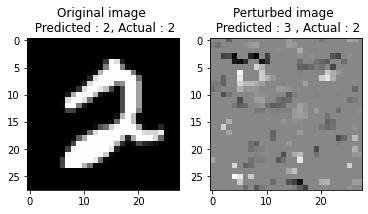

Evaluation took: 9.934486 seconds
1/1 [==============================] - 0s 68ms/step


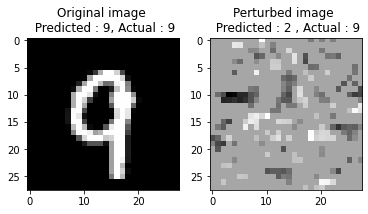

Evaluation took: 0.035009 seconds
1/1 [==============================] - 0s 25ms/step


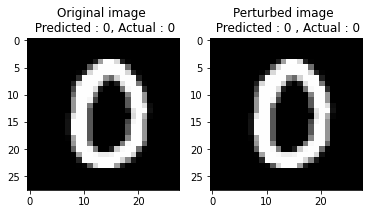

Evaluation took: 9.146508 seconds
1/1 [==============================] - 0s 33ms/step


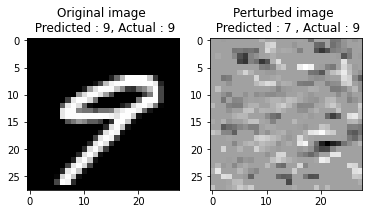

Evaluation took: 10.723334 seconds
1/1 [==============================] - 0s 41ms/step


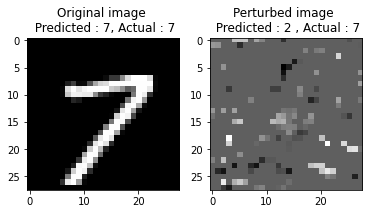

In [25]:
import tensorflow_probability as tfp
import contextlib
import time

# The below functions(np_value, timed_execution and run) are used to extract the 
# minimized gradients from the lbfgs optimizer
def np_value(tensor):
  """Get numpy value out of possibly nested tuple of tensors."""
  if isinstance(tensor, tuple):
    return type(tensor)(*(np_value(t) for t in tensor))
  else:
    return tensor.numpy()

@contextlib.contextmanager
def timed_execution():
  t0 = time.time()
  yield
  dt = time.time() - t0
  print('Evaluation took: %f seconds' % dt)
  
def run(optimizer):
  """Run an optimizer and measure it's evaluation time."""
  optimizer()  # Warmup.
  with timed_execution():
    result = optimizer()
  return np_value(result)

  
def LBFGS(model, image, actual_label):
    image = tf.cast(image, tf.float32)
    # initial guess
    # the noise will be 0
    x0 = np.zeros(np.prod(image.shape), dtype="float32").reshape(1,28,28,1)	
    # the function to be minimized by the lbfgs optimzer
    # using the gradient tape to keep track of the gradients of image
    # and obtaining the loss and associated gradient of image that has
    # some noise added to it
    def loss_grad(params):
        adversary = tf.cast(image+params,tf.float32)
        with tf.GradientTape() as tape:
            tape.watch(adversary)
            # use model predictions to obtain loss
            pred = model(adversary)
            loss = pred[0, actual_label]
        # calculate gradients of loss wrt the original image
        gradient = tf.cast(tape.gradient(loss, adversary), tf.float32)
        return loss, gradient
    
    # call the optimizer function
    def optim():
        return tfp.optimizer.lbfgs_minimize(loss_grad,
                                     initial_position=x0,
                                     tolerance=1e-08)
    # runs the lbfgs optimizers and
    # extracts the tensors containing the minimal gradient change which
    # will convert the image to an adversarial example
    res = run(optim)
    # the .position gives access to the tensor with minimum gradient value
    # use this to add noise to original image
    adversary = image + res.position
    return adversary

# randomly select 5 images and run fgsm attacks on them
for i in random.sample(range(0, x_test_correctly_classified.shape[0]),5):
    image = x_test_correctly_classified[i].reshape(1,28,28,1)
    label = y_test_correctly_classified[i].reshape(1,10)
    actual_label = np.argmax(label)
    perturbed_image = LBFGS(cnn_model,image,actual_label)
    predicted_label = np.argmax(cnn_model.predict(perturbed_image))
    plt.figure()
    plt.subplot(1,2,1)
    plt.title("Original image \n Predicted : {}, Actual : {}".format(np.argmax(label),
                                                   actual_label))
    plt.imshow(np.reshape(x_test_correctly_classified[i],(28,28)), cmap="gray")
    plt.subplot(1,2,2)
    plt.imshow(perturbed_image[0]*0.5+0.5, cmap="gray")
    plt.title("Perturbed image \n Predicted : {} , Actual : {}".format(
                                                            predicted_label,
                                                            actual_label))
    plt.show()

In [26]:
# test on xgboost for the last adversary created in the above loop

xgb_pred = xgb_model.predict(xb.DMatrix(np.reshape(perturbed_image,(1,28*28))))
print("Actual label : {} , Predicted by XGboost : {}".format(actual_label,xgb_pred[0]))

Actual label : 7 , Predicted by XGboost : 9.0


We can see that the adversarial examples are successful in fooling both the xgboost as well as CNN models

<h3> Defence against Adversarial Attack </h3>
<h4> Adversarial Training on FGSM</h4>

<p> We can observe in this technique that post adversarial training the overall accuracy of the testing data has reduced. One way to improve this is to shuffle the test data with adversarial images and then check for accuracy </p>

In [27]:
def create_fgsm_examples(model):
    while True:
        adversary_images = []
        adversary_label = []
        # train on over 5000 adversarial images
        index  = random.sample(range(0,x_test.shape[0]), 5000)
        for i in index:
            image = x_test[i].reshape(1,28,28,1)
            label = y_test[i].reshape(1,10)
            adversary = FGSM(model,image, label,eps=0.1)
            # store the perturbed image into the list
            adversary_images.append(adversary.reshape(28,28,1))
            # we use the original label associated with it and store that
            # into the adversary label list
            adversary_label.append(y_test[i])
    
        yield (np.array(adversary_images), np.array(adversary_label))

(fgsm_images, fgsm_labels) = next(create_fgsm_examples(cnn_model))
(loss, acc) = cnn_model.evaluate(x=fgsm_images, y=fgsm_labels, verbose=0)

print("Loss: {}, Accuracy: {}\n".format(loss, acc))

# recompile the model and this time fit with the adversarial examples generated
cnn_model.compile(optimizer = cnn_model_opt , loss = "categorical_crossentropy", 
                  metrics=["accuracy"]) 
cnn_model.fit(fgsm_images, fgsm_labels,
              batch_size=128,
              epochs=10)

(loss, acc) = cnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print("Post adversarial training")
print("Loss: {}, Accuracy: {}\n".format(loss, acc))
# do a final evaluation of the model on the adversarial images
(loss, acc) = cnn_model.evaluate(x=fgsm_images, y=fgsm_labels, verbose=0)
print("Evaluating on adversarial examples")
print("Loss: {}, Accuracy: {}\n".format(loss, acc))

Loss: 5.434080123901367, Accuracy: 0.5496000051498413

Epoch 1/10
40/40 [==============================] - 15s 349ms/step - loss: 0.5431 - accuracy: 0.9072
Epoch 2/10
40/40 [==============================] - 14s 350ms/step - loss: 0.0227 - accuracy: 0.9932
Epoch 3/10
40/40 [==============================] - 14s 350ms/step - loss: 0.0093 - accuracy: 0.9974
Epoch 4/10
40/40 [==============================] - 14s 354ms/step - loss: 0.0030 - accuracy: 0.9996
Epoch 5/10
40/40 [==============================] - 14s 351ms/step - loss: 0.0015 - accuracy: 0.9994
Epoch 6/10
40/40 [==============================] - 14s 350ms/step - loss: 4.6131e-04 - accuracy: 1.0000
Epoch 7/10
40/40 [==============================] - 14s 352ms/step - loss: 3.7067e-04 - accuracy: 1.0000
Epoch 8/10
40/40 [==============================] - 14s 359ms/step - loss: 2.7420e-04 - accuracy: 1.0000
Epoch 9/10
40/40 [==============================] - 15s 365ms/step - loss: 1.9666e-04 - accuracy: 1.0000
Epoch 10/10
40/40 [=

In [28]:
new_x_test = np.concatenate([x_test, fgsm_images])
new_y_test = np.concatenate([y_test, fgsm_labels])

# recompile model
cnn_model.compile(optimizer = cnn_model_opt , loss = "categorical_crossentropy", 
                  metrics=["accuracy"]) 
cnn_model.fit(new_x_test, new_y_test,
              batch_size=128,
              epochs=10)

(loss, acc) = cnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print("Post adversarial training with original test images")
print("Loss: {}, Accuracy: {}\n".format(loss, acc))
# do a final evaluation of the model on the adversarial images
(loss, acc) = cnn_model.evaluate(x=fgsm_images, y=fgsm_labels, verbose=0)
print("Evaluating on adversarial examples")
print("Loss: {}, Accuracy: {}\n".format(loss, acc))

Epoch 1/10
118/118 [==============================] - 48s 394ms/step - loss: 0.0337 - accuracy: 0.9904
Epoch 2/10
118/118 [==============================] - 44s 374ms/step - loss: 0.0145 - accuracy: 0.9950
Epoch 3/10
118/118 [==============================] - 45s 384ms/step - loss: 0.0059 - accuracy: 0.9978
Epoch 4/10
118/118 [==============================] - 44s 370ms/step - loss: 0.0026 - accuracy: 0.9995
Epoch 5/10
118/118 [==============================] - 44s 374ms/step - loss: 0.0028 - accuracy: 0.9995
Epoch 6/10
118/118 [==============================] - 44s 375ms/step - loss: 0.0027 - accuracy: 0.9991
Epoch 7/10
118/118 [==============================] - 44s 375ms/step - loss: 0.0020 - accuracy: 0.9994
Epoch 8/10
118/118 [==============================] - 45s 380ms/step - loss: 0.0015 - accuracy: 0.9994
Epoch 9/10
118/118 [==============================] - 44s 374ms/step - loss: 0.0019 - accuracy: 0.9993
Epoch 10/10
118/118 [==============================] - 44s 377ms/step - l

The accuracy of the model is a lot better now

<h4> APE-GAN </h4>

This part of the code takes more than 60 minutes(for epoch=10) to finish running. In the end we can see that the GAN model has stabilized with low loss and an accuracy of 1.0

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# loading the dataset again as I need to normalize the train data to [-1,1] range
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1)
train_data = np.concatenate([x_train, fgsm_images])
train_data = train_data.reshape(train_data.shape[0],28,28,1).astype('float32')
train_data = (train_data - 127.5)/127.5 

# create the generator model
def generator_model():
    gen_model = models.Sequential()
    gen_model.add(Dense(7*7*256, use_bias=False, input_shape=(100,)))
    gen_model.add(BatchNormalization())
    gen_model.add(LeakyReLU())
    
    gen_model.add(Reshape((7, 7, 256)))
    assert gen_model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    gen_model.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert gen_model.output_shape == (None, 7, 7, 128)
    gen_model.add(BatchNormalization())
    gen_model.add(LeakyReLU())
    
    gen_model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), 
                                  padding='same', use_bias=False))
    assert gen_model.output_shape == (None, 14, 14, 64)
    gen_model.add(BatchNormalization())
    gen_model.add(LeakyReLU())

    gen_model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2),
                                  padding='same', use_bias=False, 
                                  activation='tanh'))
    return gen_model

# create the discriminator model
def discriminator_model():
    disc_model = models.Sequential()
    disc_model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    disc_model.add(LeakyReLU())
    disc_model.add(Dropout(0.2))

    disc_model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    disc_model.add(LeakyReLU())
    disc_model.add(Dropout(0.2))

    disc_model.add(Flatten())
    disc_model.add(Dense(1))
    return disc_model

generator = generator_model()
discriminator = discriminator_model()

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

discriminator.compile(loss="binary_crossentropy", optimizer=discriminator_optimizer)
EPOCHS = 10
noise_dim = 100
num_examples_to_generate = 256
BUFFER_SIZE = train_data.shape[0]
BATCH_SIZE = 256

# start builiding the GAN model
# freeze the discrimintaor weights
discriminator.trainable = False

test_input = Input(shape=(noise_dim,))
# combine the generator and discriminator model
test_output = discriminator(generator(test_input))

GAN_model = Model(test_input, test_output)
# use the Adam optimizer for GAN
GAN_model.compile(loss="binary_crossentropy", optimizer=discriminator_optimizer,
                  metrics=['accuracy'])
noise = tf.random.normal([256, noise_dim])

# create batch data on the training dataset
train_data = tf.data.Dataset.from_tensor_slices(train_data).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

for epoch in range(EPOCHS):
    print("Epoch {} of {}".format(epoch+1, EPOCHS))
    for image_batch in train_data:
        noise = tf.random.normal([BATCH_SIZE, noise_dim])
        gen_img = generator.predict(noise, verbose=0)
        x = np.concatenate([image_batch, gen_img])
        # creating labels as 1 and 0 for discriminator as it has to just classify as real or fake
        y = np.reshape(([1] *int(x.shape[0]/2)) + ([0] * int(x.shape[0]/2)),(-1,))
        # train discrimnator on both original images and with noise
        discriminator_loss = discriminator.train_on_batch(x,y)        
        perturbed_labels = np.reshape([1]* BATCH_SIZE,(-1,))
        # use the noise to and labels to train GAN model
        GAN_loss = GAN_model.train_on_batch(noise, perturbed_labels)        
    
    print("Discriminator Loss={}, GAN loss={} ".format(discriminator_loss, GAN_loss))


Epoch 1 of 10
